In [1]:
import numpy as np
import pandas
from pandas import DataFrame
from SHARED.shared_utils import introduce_nans

Explore the Dataset

!!! Remember, Inspection of the data is key !!!
                                
                                            Dr. Metehan GÜZEL

In [2]:
df = pandas.read_csv('plant_growth_data.csv')

In [3]:
df.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [4]:
df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [5]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [6]:
# I like to encapsulate feature names as variables to prevent misspellings vs.

key_SOIL_TYPE = 'Soil_Type'
key_TEMPERATURE = 'Temperature'
key_HUMIDITY = 'Humidity'
key_GROWTH_MILESTONE = 'Growth_Milestone'
key_SUNLIGHT_HOURS = 'Sunlight_Hours'
key_WATER_FREQUENCY = 'Water_Frequency'
key_FERTILIZER_TYPE = 'Fertilizer_Type'

numeric_features = [key_SUNLIGHT_HOURS, 
                    key_TEMPERATURE, 
                    key_HUMIDITY, 
                    key_GROWTH_MILESTONE]

textual_features = [key_FERTILIZER_TYPE, 
                    key_SOIL_TYPE, 
                    key_WATER_FREQUENCY]

The aim of this tutorial is to identify and impute missing values, but we are currently working on a complete dataset. So, we need some missing values.

Let's introduce some NaNs

In [7]:
df_untouched = df.copy()

In [8]:
# Parameters
#   * row_ratio : The ratio of rows that has missing values
#   * ratio     : The ratio of missing values at each row (subject to row_ratio tho) 

df_dummy = df.copy()

nanned_df = introduce_nans(df=df_dummy, row_ratio=0.25, ratio=0.5)

In [9]:
nanned_df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,176.000000,173.000000,173.000000,165.000000
mean,6.807368,24.989572,58.005706,0.503030
std,1.592114,5.320125,12.532341,0.501513
min,4.033133,15.200000,30.567682,0.000000
25%,5.486000,20.637095,48.812979,0.000000
50%,6.824500,25.062725,59.168438,1.000000
75%,8.239536,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.331979,1.000000


Some Basic Functions and Variables

In [10]:
def sub_dataframe(dataframe, key: str):
    return DataFrame(data=dataframe[key], columns=[key])

In [11]:
imputed_datasets = {}

In [12]:
imputed_features = {}

for feature in numeric_features:
    imputed_features[feature] = {}
    
for feature in textual_features:
    imputed_features[feature] = {}

Let's Perform Some Basics

Simple Imputer

Numeric Data

* Mean
* Median
* Most-Frequent
* Constant
    
String
* Most Frequent
* Constant

Source: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [13]:
from sklearn.impute import SimpleImputer
import numpy

In [14]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [15]:
imp_strategies = ['mean',           # Ortalama,     N
                  'median',         # Orta Eleman,  N
                  'most_frequent',  # En Yaygın,    N-S
                  'constant']       # Sabit,      N-S

In [16]:
sss = sub_dataframe(dataframe=nanned_df, 
                    key='Soil_Type')

In [17]:
sss.head()

,Soil_Type
0,loam
1,sandy
2,loam
3,loam
4,sandy


In [18]:
# A crude approach
# Fill missing values at once using a single strategy

# 3 ->  Most Frequent
imputer_simple_crude_2 = SimpleImputer(missing_values=numpy.nan,
                                       strategy=imp_strategies[2])

imputed_df_sc2 = DataFrame(data=imputer_simple_crude_2.fit_transform(nanned_df),
                           columns=nanned_df.columns)

In [19]:
df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [20]:
nanned_df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0.0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1.0
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0.0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0.0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0.0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0.0
6,loam,4.444268,daily,organic,25.984533,69.578952,1.0
7,clay,6.150794,daily,organic,29.291918,69.480907,0.0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1.0
9,loam,9.178621,weekly,organic,20.598678,54.721015,1.0


In [21]:
imputed_df_sc2.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0.0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1.0
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0.0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0.0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0.0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0.0
6,loam,4.444268,daily,organic,25.984533,69.578952,1.0
7,clay,6.150794,daily,organic,29.291918,69.480907,0.0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1.0
9,loam,9.178621,weekly,organic,20.598678,54.721015,1.0


In [22]:
# Add imputed dataframe for further inspection

imputed_datasets['Simple Crude Strategy 2'] = imputed_df_sc2

In [23]:
# More Delicate Approach
# Feature by Feature Imputation
# Numerical Features

temp = {}

for feature in numeric_features:
    # Impute each feature with possible methods and add imputed feature to dict for further inspection
    if feature not in temp:
        temp[feature] = {}
    for strategy in imp_strategies:
        feature_column = sub_dataframe(dataframe=nanned_df,
                                       key=feature)
        if feature == 'constant':
            imputer = SimpleImputer(missing_values=numpy.nan,
                                    strategy=strategy,
                                    fill_value=0)
        else:
            imputer = SimpleImputer(missing_values=numpy.nan,
                                    strategy=strategy)
        imputed_feature = DataFrame(data=imputer.fit_transform(feature_column),
                                    columns=feature_column.columns)
        temp[feature][strategy] = imputed_feature

In [ ]:
temp[]

In [24]:
temp.keys()

dict_keys(['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone'])

In [25]:
temp[key_TEMPERATURE]

{'mean':      Temperature
 0      31.719602
 1      28.919484
 2      23.179059
 3      18.465886
 4      18.128741
 ..           ...
 188    28.000000
 189    30.500000
 190    24.500000
 191    27.900000
 192    21.700000
 
 [193 rows x 1 columns],
 'median':      Temperature
 0      31.719602
 1      28.919484
 2      23.179059
 3      18.465886
 4      18.128741
 ..           ...
 188    28.000000
 189    30.500000
 190    24.500000
 191    27.900000
 192    21.700000
 
 [193 rows x 1 columns],
 'most_frequent':      Temperature
 0      31.719602
 1      28.919484
 2      23.179059
 3      18.465886
 4      18.128741
 ..           ...
 188    28.000000
 189    30.500000
 190    24.500000
 191    27.900000
 192    21.700000
 
 [193 rows x 1 columns],
 'constant':      Temperature
 0      31.719602
 1      28.919484
 2      23.179059
 3      18.465886
 4      18.128741
 ..           ...
 188    28.000000
 189    30.500000
 190    24.500000
 191    27.900000
 192    21.700000
 
 [193 

In [26]:
# More Delicate Approach
# Feature by Feature Imputation
# Textual Features

temp_2 = {}

for feature in textual_features:
    # Impute each feature with possible methods and add imputed feature to dict for further inspection if feature not in temp:
    if feature not in temp_2:
        temp_2[feature] = {}
    for strategy in ['most_frequent', 'constant']:
        feature_column = sub_dataframe(dataframe=nanned_df,
                                       key=feature)
        if feature == 'constant':
            imputer = SimpleImputer(missing_values=numpy.nan,
                                    strategy=strategy,
                                    fill_value='Missing')
        else:
            imputer = SimpleImputer(missing_values=numpy.nan,
                                    strategy=strategy)
        imputed_feature = DataFrame(data=imputer.fit_transform(feature_column),
                                    columns=feature_column.columns)
        temp_2[feature][strategy] = imputed_feature

In [27]:
temp_2.keys()

dict_keys(['Fertilizer_Type', 'Soil_Type', 'Water_Frequency'])

In [28]:
temp_2[key_FERTILIZER_TYPE]

{'most_frequent':     Fertilizer_Type
 0          chemical
 1           organic
 2              none
 3              none
 4           organic
 ..              ...
 188            none
 189        chemical
 190            none
 191            none
 192            none
 
 [193 rows x 1 columns],
 'constant':     Fertilizer_Type
 0          chemical
 1           organic
 2              none
 3              none
 4           organic
 ..              ...
 188            none
 189        chemical
 190   missing_value
 191   missing_value
 192            none
 
 [193 rows x 1 columns]}

We imputed values, but how good are they
Can we measure the goodness of the imputation process 

We need them metrics

In [29]:
# Score dicts

scores = {}

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for feature in temp:
    for strategy in temp[feature]:
        r2_scorE = r2_score(temp[feature][strategy], df[feature])
        mse_error = mean_squared_error(temp[feature][strategy], df[feature])
        mae_error = mean_absolute_error(temp[feature][strategy], df[feature])
        if not scores.__contains__(feature):
            scores[feature] = {}
        scores[feature][strategy] = {'R2': float(round(r2_scorE,2)), 
                                     'MSE': float(round(mse_error,2)), 
                                     'MAE': float(round(mae_error,2))}
    

In [31]:
scores[key_HUMIDITY]['mean']

{'R2': 0.87, 'MSE': 18.77, 'MAE': 1.16}

In [32]:
from sklearn.metrics import accuracy_score

for feature in temp_2:
    for strategy in temp_2[feature]:
        acc = accuracy_score(temp_2[feature][strategy], df[feature])
        if not scores.__contains__(feature):
            scores[feature] = {}
        scores[feature][strategy] = {'Accuracy': acc}

In [33]:
scores

{'Sunlight_Hours': {'mean': {'R2': 0.89, 'MSE': 0.25, 'MAE': 0.13},
  'median': {'R2': 0.89, 'MSE': 0.25, 'MAE': 0.13},
  'most_frequent': {'R2': 0.87, 'MSE': 0.31, 'MAE': 0.15},
  'constant': {'R2': 0.24, 'MSE': 4.59, 'MAE': 0.62}},
 'Temperature': {'mean': {'R2': 0.87, 'MSE': 3.3, 'MAE': 0.53},
  'median': {'R2': 0.87, 'MSE': 3.29, 'MAE': 0.52},
  'most_frequent': {'R2': 0.82, 'MSE': 4.75, 'MAE': 0.62},
  'constant': {'R2': 0.13, 'MSE': 72.34, 'MAE': 2.68}},
 'Humidity': {'mean': {'R2': 0.87, 'MSE': 18.77, 'MAE': 1.16},
  'median': {'R2': 0.87, 'MSE': 18.7, 'MAE': 1.15},
  'most_frequent': {'R2': 0.86, 'MSE': 20.27, 'MAE': 1.19},
  'constant': {'R2': 0.16, 'MSE': 378.26, 'MAE': 6.1}},
 'Growth_Milestone': {'mean': {'R2': 0.83, 'MSE': 0.04, 'MAE': 0.07},
  'median': {'R2': 0.68, 'MSE': 0.08, 'MAE': 0.08},
  'most_frequent': {'R2': 0.68, 'MSE': 0.08, 'MAE': 0.08},
  'constant': {'R2': 0.73, 'MSE': 0.07, 'MAE': 0.07}},
 'Fertilizer_Type': {'most_frequent': {'Accuracy': 0.917098445595855

Lets Encode :)

In [34]:
df_enc = df.copy()

df_enc

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [35]:
import pandas

df_enc = df.copy()

# One Hot Encoding
for feature in [key_SOIL_TYPE, key_FERTILIZER_TYPE]:
    dummies = pandas.get_dummies(df_enc[feature])
    for dumdum_feature in dummies:
        df_enc[dumdum_feature] = dummies[dumdum_feature]
    df_enc.drop(feature, axis=1, inplace=True)

df_enc

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,bi-weekly,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,weekly,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,bi-weekly,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,bi-weekly,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,bi-weekly,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,daily,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,weekly,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,bi-weekly,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,daily,27.900000,69.500000,1,False,False,True,False,False,True


In [36]:
df_enc[key_WATER_FREQUENCY].unique()

array(['bi-weekly', 'weekly', 'daily'], dtype=object)

In [37]:
df_enc [key_WATER_FREQUENCY].replace(to_replace=['bi-weekly', 'weekly', 'daily'], value=[1, 7, 14], inplace=True)

/tmp/ipykernel_8816/2687967743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enc [key_WATER_FREQUENCY].replace(to_replace=['bi-weekly', 'weekly', 'daily'], value=[1, 7, 14], inplace=True)
/tmp/ipykernel_8816/2687967743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc [key_WATER_FR

In [38]:
df_enc

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,1,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,7,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,1,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,1,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,1,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,7,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,1,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,14,27.900000,69.500000,1,False,False,True,False,False,True


<Axes: >

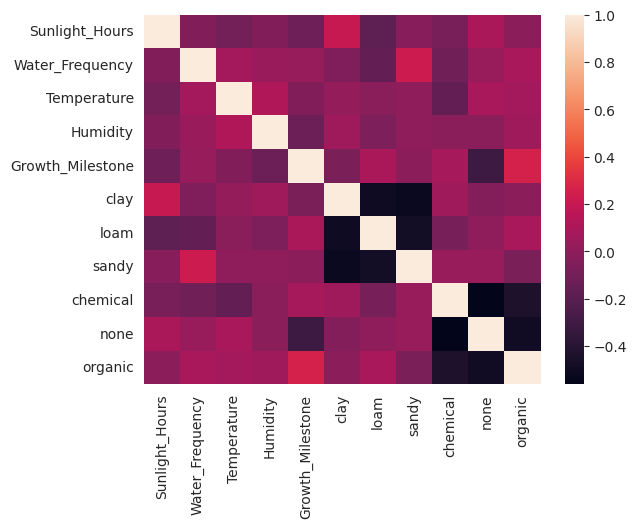

In [39]:
import seaborn

seaborn.heatmap(df_enc.corr())

In [40]:
df_enc.corr()

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
Sunlight_Hours,1.000000,-0.051524,-0.100628,-0.052482,-0.122212,0.204649,-0.180748,-0.027667,-0.085771,0.092041,-0.009391
Water_Frequency,-0.051524,1.000000,0.074307,0.038085,0.025668,-0.060009,-0.161419,0.220785,-0.113833,0.032320,0.084840
Temperature,-0.100628,0.074307,1.000000,0.117648,-0.053577,0.022744,-0.023218,0.000030,-0.163723,0.090451,0.074400
Humidity,-0.052482,0.038085,0.117648,1.000000,-0.130328,0.058284,-0.062929,0.003479,-0.023289,-0.023958,0.050469
Growth_Milestone,-0.122212,0.025668,-0.053577,-0.130328,1.000000,-0.072409,0.092334,-0.018362,0.080436,-0.315610,0.257165
clay,0.204649,-0.060009,0.022744,0.058284,-0.072409,1.000000,-0.501663,-0.513626,0.056081,-0.037810,-0.018090
loam,-0.180748,-0.161419,-0.023218,-0.062929,0.092334,-0.501663,1.000000,-0.484569,-0.091115,0.005203,0.090293
sandy,-0.027667,0.220785,0.000030,0.003479,-0.018362,-0.513626,-0.484569,1.000000,0.033663,0.033073,-0.071265
chemical,-0.085771,-0.113833,-0.163723,-0.023289,0.080436,0.056081,-0.091115,0.033663,1.000000,-0.561945,-0.444162
none,0.092041,0.032320,0.090451,-0.023958,-0.315610,-0.037810,0.005203,0.033073,-0.561945,1.000000,-0.491509


In [41]:
df_imp = df.copy()

for feature in temp:
    for strategy in temp[feature]:
        df_imp[str(feature + "_" + strategy)] = temp[feature][strategy]
for feature in temp_2:
    for strategy in temp_2[feature]:
        df_imp[str(feature + "_" + strategy)] = temp_2[feature][strategy]

for feature in df_imp.columns:
    if key_SOIL_TYPE in feature or key_FERTILIZER_TYPE in feature:
        dummies = pandas.get_dummies(df_imp[feature])
        for dumdum_feature in dummies:
            df_imp[str(feature + dumdum_feature)] = dummies[dumdum_feature]
        df_imp.drop(feature, axis=1, inplace=True)
    elif key_WATER_FREQUENCY in feature:
        df_imp [feature].replace(to_replace=['bi-weekly', 'weekly', 'daily', 'missing_value'], value=[1, 2, 14, 0], inplace=True)

df_imp

/tmp/ipykernel_8816/1679276740.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imp [feature].replace(to_replace=['bi-weekly', 'weekly', 'daily', 'missing_value'], value=[1, 2, 14, 0], inplace=True)
/tmp/ipykernel_8816/1679276740.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imp [fe

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,Sunlight_Hours_mean,Sunlight_Hours_median,Sunlight_Hours_most_frequent,Sunlight_Hours_constant,Temperature_mean,...,Fertilizer_Type_constantmissing_value,Fertilizer_Type_constantnone,Fertilizer_Type_constantorganic,Soil_Type_most_frequentclay,Soil_Type_most_frequentloam,Soil_Type_most_frequentsandy,Soil_Type_constantclay,Soil_Type_constantloam,Soil_Type_constantmissing_value,Soil_Type_constantsandy
0,5.192294,1,31.719602,61.591861,0,5.192294,5.192294,5.192294,5.192294,31.719602,...,False,False,False,False,True,False,False,True,False,False
1,4.033133,2,28.919484,52.422276,1,4.033133,4.033133,4.033133,4.033133,28.919484,...,False,False,True,False,False,True,False,False,False,True
2,8.892769,1,23.179059,44.660539,0,8.892769,8.892769,8.892769,8.892769,23.179059,...,False,True,False,False,True,False,False,True,False,False
3,8.241144,1,18.465886,46.433227,0,8.241144,8.241144,8.241144,8.241144,18.465886,...,False,True,False,False,True,False,False,True,False,False
4,8.374043,1,18.128741,63.625923,0,8.374043,8.374043,8.374043,8.374043,18.128741,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14,28.000000,70.200000,0,5.652000,5.652000,5.652000,5.652000,28.000000,...,False,True,False,False,False,True,False,False,False,True
189,7.528000,2,30.500000,60.100000,1,7.528000,7.528000,7.528000,7.528000,30.500000,...,False,False,False,True,False,False,True,False,False,False
190,4.934000,1,24.500000,61.700000,0,4.934000,4.934000,4.934000,4.934000,24.500000,...,True,False,False,False,True,False,False,True,False,False
191,8.273000,14,27.900000,69.500000,1,8.273000,8.273000,8.273000,8.273000,27.900000,...,True,False,False,False,False,True,False,False,False,True


In [42]:
df_imp['Water_Frequency_constant'].unique()

array([ 1,  2, 14,  0])

<Axes: >

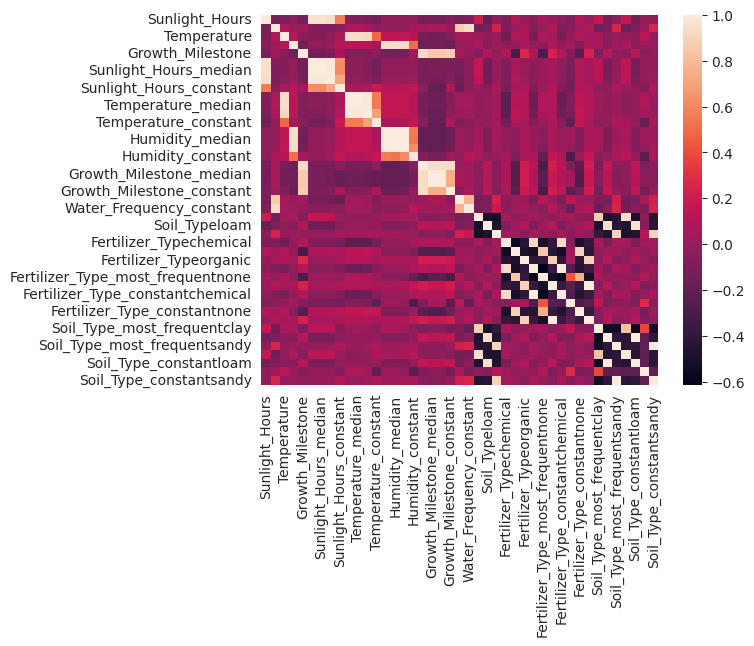

In [43]:
seaborn.heatmap(df_imp.corr())

In [44]:
df_imp.corr()

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,Sunlight_Hours_mean,Sunlight_Hours_median,Sunlight_Hours_most_frequent,Sunlight_Hours_constant,Temperature_mean,...,Fertilizer_Type_constantmissing_value,Fertilizer_Type_constantnone,Fertilizer_Type_constantorganic,Soil_Type_most_frequentclay,Soil_Type_most_frequentloam,Soil_Type_most_frequentsandy,Soil_Type_constantclay,Soil_Type_constantloam,Soil_Type_constantmissing_value,Soil_Type_constantsandy
Sunlight_Hours,1.000000,-0.106590,-0.100628,-0.052482,-0.122212,0.950289,0.950408,0.937830,0.556834,-0.077727,...,-0.082333,0.100535,0.004031,0.156464,-0.139025,-0.029551,0.170951,-0.139025,-0.009445,-0.029551
Water_Frequency,-0.106590,1.000000,0.089149,0.003112,0.025761,-0.078286,-0.078208,-0.080715,-0.067404,0.082152,...,-0.068242,0.044835,0.094415,-0.150558,-0.090574,0.256306,-0.165718,-0.090574,0.011046,0.256306
Temperature,-0.100628,0.089149,1.000000,0.117648,-0.053577,-0.071902,-0.072302,-0.055554,0.053870,0.940466,...,-0.024822,0.104630,0.040176,0.057239,-0.043808,-0.017972,-0.023905,-0.043808,0.135351,-0.017972
Humidity,-0.052482,0.003112,0.117648,1.000000,-0.130328,-0.026165,-0.026649,-0.006874,0.102748,0.125237,...,0.033079,-0.074863,0.064562,0.049468,-0.061795,0.008778,0.056221,-0.061795,-0.006476,0.008778
Growth_Milestone,-0.122212,0.025761,-0.053577,-0.130328,1.000000,-0.129650,-0.130171,-0.108057,0.048002,-0.079240,...,-0.072596,-0.250544,0.235678,-0.100818,0.116408,-0.008207,-0.063013,0.116408,-0.069609,-0.008207
Sunlight_Hours_mean,0.950289,-0.078286,-0.071902,-0.026165,-0.129650,1.000000,0.999995,0.992008,0.617863,-0.052248,...,-0.112349,0.094279,0.036749,0.120386,-0.116707,-0.012845,0.132212,-0.116707,-0.008358,-0.012845
Sunlight_Hours_median,0.950408,-0.078208,-0.072302,-0.026649,-0.130171,0.999995,1.000000,0.991599,0.615342,-0.052662,...,-0.112075,0.094085,0.036477,0.120855,-0.116848,-0.013214,0.132530,-0.116848,-0.008073,-0.013214
Sunlight_Hours_most_frequent,0.937830,-0.080715,-0.055554,-0.006874,-0.108057,0.992008,0.991599,1.000000,0.712134,-0.035510,...,-0.122236,0.101146,0.047168,0.100913,-0.110196,0.001793,0.118614,-0.110196,-0.019511,0.001793
Sunlight_Hours_constant,0.556834,-0.067404,0.053870,0.102748,0.048002,0.617863,0.615342,0.712134,1.000000,0.069421,...,-0.136623,0.105744,0.089464,-0.040974,-0.037345,0.082647,0.003533,-0.037345,-0.075085,0.082647
Temperature_mean,-0.077727,0.082152,0.940466,0.125237,-0.079240,-0.052248,-0.052662,-0.035510,0.069421,1.000000,...,-0.072294,0.148683,0.080777,0.011280,-0.022463,0.010505,-0.044769,-0.022463,0.090996,0.010505


In [45]:
from sklearn.impute import KNNImputer

In [46]:
df_enc

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,1,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,7,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,1,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,1,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,1,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,7,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,1,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,14,27.900000,69.500000,1,False,False,True,False,False,True


In [47]:
# Parameters
#   * row_ratio : The ratio of rows that has missing values
#   * ratio     : The ratio of missing values at each row (subject to row_ratio tho) 

df_enc_yedek = df_enc.copy()

nanned_df_enc = introduce_nans(df=df_enc, row_ratio=0.25, ratio=0.5)

/home/metehanguzel/Desktop/projects/DDYM_PP_master/SHARED/shared_utils.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.at[index, df.columns[nan_loc]] = numpy.nan
/home/metehanguzel/Desktop/projects/DDYM_PP_master/SHARED/shared_utils.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.at[index, df.columns[nan_loc]] = numpy.nan
/home/metehanguzel/Desktop/projects/DDYM_PP_master/SHARED/shared_utils.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.at[in

In [48]:
#nanned_df_enc[key_WATER_FREQUENCY].replace(to_replace=[1.0, 2.0, 14.0], value=['daily', 'weekly', 'bi-weekly'], inplace=True)

nanned_df_enc[key_WATER_FREQUENCY].unique()

array([ 1.,  7., nan, 14.])

In [49]:
imputer = KNNImputer(n_neighbors=2)
df_enc_knn = imputer.fit_transform(nanned_df_enc)

Let's Go Ballistic (KNN is not very ballistic but i love some drama :P)

In [50]:
nanned_df_enc

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,1.0,31.719602,61.591861,NaN,NaN,NaN,False,True,NaN,NaN
1,4.033133,7.0,28.919484,52.422276,1.0,False,False,True,False,False,True
2,NaN,1.0,23.179059,NaN,0.0,NaN,True,NaN,NaN,True,False
3,8.241144,1.0,18.465886,46.433227,0.0,False,True,False,False,True,False
4,8.374043,1.0,18.128741,63.625923,0.0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14.0,28.000000,NaN,0.0,NaN,NaN,NaN,False,True,NaN
189,7.528000,7.0,30.500000,60.100000,1.0,True,False,False,True,False,False
190,4.934000,1.0,24.500000,61.700000,NaN,NaN,True,NaN,NaN,NaN,False
191,8.273000,14.0,27.900000,69.500000,1.0,False,False,True,False,False,True


In [51]:
df_enc_knn

array([[ 5.19229409,  1.        , 31.71960241, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.0331327 ,  7.        , 28.91948412, ...,  0.        ,
         0.        ,  1.        ],
       [ 6.833     ,  1.        , 23.17905889, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 4.934     ,  1.        , 24.5       , ...,  0.5       ,
         0.        ,  0.        ],
       [ 8.273     , 14.        , 27.9       , ...,  0.        ,
         0.        ,  1.        ],
       [ 8.3955    ,  7.        , 23.5       , ...,  0.5       ,
         0.        ,  0.        ]])

In [52]:
df_enc_knn = DataFrame(data=df_enc_knn, 
                       columns=nanned_df_enc.columns)

In [53]:
df_enc_knn

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,1.0,31.719602,61.591861,1.0,0.5,0.0,0.0,1.0,0.0,0.0
1,4.033133,7.0,28.919484,52.422276,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,6.833000,1.0,23.179059,60.550000,0.0,0.5,1.0,0.0,0.0,1.0,0.0
3,8.241144,1.0,18.465886,46.433227,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,8.374043,1.0,18.128741,63.625923,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14.0,28.000000,67.600027,0.0,0.0,1.0,0.0,0.0,1.0,0.0
189,7.528000,7.0,30.500000,60.100000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
190,4.934000,1.0,24.500000,61.700000,0.5,0.5,1.0,0.5,0.5,0.0,0.0
191,8.273000,14.0,27.900000,69.500000,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
df_enc_yedek

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,1,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,7,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,1,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,1,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,1,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,7,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,1,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,14,27.900000,69.500000,1,False,False,True,False,False,True


In [55]:
df_enc_knn[key_WATER_FREQUENCY].unique()

array([ 1. ,  7. , 14. ,  7.5, 10.5,  4. ])

In [56]:
df_enc_knn[key_WATER_FREQUENCY] = df_enc_knn[key_WATER_FREQUENCY].mask(df_enc_knn[key_WATER_FREQUENCY] < 3.5, 1.0)
df_enc_knn[key_WATER_FREQUENCY] = df_enc_knn[key_WATER_FREQUENCY].mask(10.5 <= df_enc_knn[key_WATER_FREQUENCY], 14.0)
df_enc_knn[key_WATER_FREQUENCY] = df_enc_knn[key_WATER_FREQUENCY].mask((df_enc_knn[key_WATER_FREQUENCY] >= 3.5) & (df_enc_knn[key_WATER_FREQUENCY] < 10.5), 7.0)

In [57]:
# Some function to compare 
from sklearn.metrics import accuracy_score

knn_comparison_scores = {}

for feature in [key_SUNLIGHT_HOURS, key_TEMPERATURE, key_HUMIDITY]:
    knn_comparison_scores[feature] = r2_score(df_enc_knn[feature], df_enc_yedek[feature])

In [58]:
knn_comparison_scores

{'Sunlight_Hours': 0.7928292914745824,
 'Temperature': 0.8354215493979369,
 'Humidity': 0.8238817870067189}

In [59]:
for feature in ['clay', 'loam', 'sandy', 'chemical', 'none', 'organic', key_GROWTH_MILESTONE]:
    df_enc_knn[feature].replace(to_replace=[1.0, 0.0, 0.5], value=[True, False, True], inplace=True)
df_enc_knn[key_WATER_FREQUENCY].replace(to_replace=[1.0, 7.0, 14.0], value=['daily', 'weekly', 'bi-weekly'], inplace=True)
df_enc_yedek[key_WATER_FREQUENCY].replace(to_replace=[1.0, 7.0, 14.0], value=['daily', 'weekly', 'bi-weekly'], inplace=True)
df_enc_knn

/tmp/ipykernel_8816/903555570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enc_knn[feature].replace(to_replace=[1.0, 0.0, 0.5], value=[True, False, True], inplace=True)
/tmp/ipykernel_8816/903555570.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc_knn[feature].replace(to_replace=

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,daily,31.719602,61.591861,True,True,False,False,True,False,False
1,4.033133,weekly,28.919484,52.422276,True,False,False,True,False,False,True
2,6.833000,daily,23.179059,60.550000,False,True,True,False,False,True,False
3,8.241144,daily,18.465886,46.433227,False,False,True,False,False,True,False
4,8.374043,daily,18.128741,63.625923,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,bi-weekly,28.000000,67.600027,False,False,True,False,False,True,False
189,7.528000,weekly,30.500000,60.100000,True,True,False,False,True,False,False
190,4.934000,daily,24.500000,61.700000,True,True,True,True,True,False,False
191,8.273000,bi-weekly,27.900000,69.500000,True,False,False,True,False,False,True


In [60]:
for feature in [key_WATER_FREQUENCY, key_GROWTH_MILESTONE, 'clay', 'loam', 'sandy', 'chemical', 'none', 'organic']:
    knn_comparison_scores[feature] = accuracy_score(df_enc_knn[feature], df_enc_yedek[feature])

In [61]:
knn_comparison_scores

{'Sunlight_Hours': 0.7928292914745824,
 'Temperature': 0.8354215493979369,
 'Humidity': 0.8238817870067189,
 'Water_Frequency': 0.927461139896373,
 'Growth_Milestone': 0.917098445595855,
 'clay': 0.9015544041450777,
 'loam': 0.9326424870466321,
 'sandy': 0.9430051813471503,
 'chemical': 0.9740932642487047,
 'none': 0.9430051813471503,
 'organic': 0.9533678756476683}

In [62]:
scores

{'Sunlight_Hours': {'mean': {'R2': 0.89, 'MSE': 0.25, 'MAE': 0.13},
  'median': {'R2': 0.89, 'MSE': 0.25, 'MAE': 0.13},
  'most_frequent': {'R2': 0.87, 'MSE': 0.31, 'MAE': 0.15},
  'constant': {'R2': 0.24, 'MSE': 4.59, 'MAE': 0.62}},
 'Temperature': {'mean': {'R2': 0.87, 'MSE': 3.3, 'MAE': 0.53},
  'median': {'R2': 0.87, 'MSE': 3.29, 'MAE': 0.52},
  'most_frequent': {'R2': 0.82, 'MSE': 4.75, 'MAE': 0.62},
  'constant': {'R2': 0.13, 'MSE': 72.34, 'MAE': 2.68}},
 'Humidity': {'mean': {'R2': 0.87, 'MSE': 18.77, 'MAE': 1.16},
  'median': {'R2': 0.87, 'MSE': 18.7, 'MAE': 1.15},
  'most_frequent': {'R2': 0.86, 'MSE': 20.27, 'MAE': 1.19},
  'constant': {'R2': 0.16, 'MSE': 378.26, 'MAE': 6.1}},
 'Growth_Milestone': {'mean': {'R2': 0.83, 'MSE': 0.04, 'MAE': 0.07},
  'median': {'R2': 0.68, 'MSE': 0.08, 'MAE': 0.08},
  'most_frequent': {'R2': 0.68, 'MSE': 0.08, 'MAE': 0.08},
  'constant': {'R2': 0.73, 'MSE': 0.07, 'MAE': 0.07}},
 'Fertilizer_Type': {'most_frequent': {'Accuracy': 0.917098445595855

Lets Combine ^^

In [63]:
# Source for KNN Imputation -> df_enc_knn
# Source for Simple Imputation -> df_imp

In [64]:
df_imp

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,Sunlight_Hours_mean,Sunlight_Hours_median,Sunlight_Hours_most_frequent,Sunlight_Hours_constant,Temperature_mean,...,Fertilizer_Type_constantmissing_value,Fertilizer_Type_constantnone,Fertilizer_Type_constantorganic,Soil_Type_most_frequentclay,Soil_Type_most_frequentloam,Soil_Type_most_frequentsandy,Soil_Type_constantclay,Soil_Type_constantloam,Soil_Type_constantmissing_value,Soil_Type_constantsandy
0,5.192294,1,31.719602,61.591861,0,5.192294,5.192294,5.192294,5.192294,31.719602,...,False,False,False,False,True,False,False,True,False,False
1,4.033133,2,28.919484,52.422276,1,4.033133,4.033133,4.033133,4.033133,28.919484,...,False,False,True,False,False,True,False,False,False,True
2,8.892769,1,23.179059,44.660539,0,8.892769,8.892769,8.892769,8.892769,23.179059,...,False,True,False,False,True,False,False,True,False,False
3,8.241144,1,18.465886,46.433227,0,8.241144,8.241144,8.241144,8.241144,18.465886,...,False,True,False,False,True,False,False,True,False,False
4,8.374043,1,18.128741,63.625923,0,8.374043,8.374043,8.374043,8.374043,18.128741,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,14,28.000000,70.200000,0,5.652000,5.652000,5.652000,5.652000,28.000000,...,False,True,False,False,False,True,False,False,False,True
189,7.528000,2,30.500000,60.100000,1,7.528000,7.528000,7.528000,7.528000,30.500000,...,False,False,False,True,False,False,True,False,False,False
190,4.934000,1,24.500000,61.700000,0,4.934000,4.934000,4.934000,4.934000,24.500000,...,True,False,False,False,True,False,False,True,False,False
191,8.273000,14,27.900000,69.500000,1,8.273000,8.273000,8.273000,8.273000,27.900000,...,True,False,False,False,False,True,False,False,False,True


In [65]:
# Features
# * Sunlight Hours
# * Water Freq.
# * Temp.
# * Humid.
# * Growth Milestone (Output)
# * Fert.
# * Soil Type

# Source for KNN Imputation -> df_enc_knn
# Source for Simple Imputation -> df_imp

final_df = DataFrame()

final_df[key_SUNLIGHT_HOURS] = temp[key_SUNLIGHT_HOURS]['median']
final_df[key_WATER_FREQUENCY] = df_enc_knn[key_WATER_FREQUENCY]
final_df[key_TEMPERATURE] = temp[key_TEMPERATURE]['mean']
final_df[key_HUMIDITY] = temp[key_HUMIDITY]['median']

# Fertilizer

final_df['chemical'] = df_enc_knn['chemical']
final_df['none'] = df_enc_knn['none']
final_df['organic'] = df_enc_knn['chemical']

# Soil Type

final_df['clay'] = df_enc_knn['clay']
final_df['loam'] = df_enc_knn['loam']
final_df['sandy'] = df_enc_knn['sandy']

final_df[key_GROWTH_MILESTONE] = df[key_GROWTH_MILESTONE]

final_df

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,chemical,none,organic,clay,loam,sandy,Growth_Milestone
0,5.192294,daily,31.719602,61.591861,True,False,True,True,False,False,0
1,4.033133,weekly,28.919484,52.422276,False,False,False,False,False,True,1
2,8.892769,daily,23.179059,44.660539,False,True,False,True,True,False,0
3,8.241144,daily,18.465886,46.433227,False,True,False,False,True,False,0
4,8.374043,daily,18.128741,63.625923,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,bi-weekly,28.000000,70.200000,False,True,False,False,True,False,0
189,7.528000,weekly,30.500000,60.100000,True,False,True,True,False,False,1
190,4.934000,daily,24.500000,59.168438,True,False,True,True,True,True,0
191,8.273000,bi-weekly,27.900000,69.500000,False,False,False,False,False,True,1


Lets Classify

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

def classification_result(data: DataFrame):
    data_out = data[key_GROWTH_MILESTONE]
    data_in = data.drop(columns=[key_GROWTH_MILESTONE])
    
    X_train, X_test, y_train, y_test = train_test_split(data_in, data_out, test_size=0.3, random_state=42)
    
    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    return metrics.accuracy_score(y_test, y_pred)

In [67]:
from sklearn import preprocessing

final_df[key_WATER_FREQUENCY].replace(to_replace=['daily', 'weekly', 'bi-weekly'], value=[1, 2, 3], inplace=True)

scaler = preprocessing.MinMaxScaler()

norm_final_df = pandas.DataFrame(data=scaler.fit_transform(final_df), columns=final_df.columns)

/tmp/ipykernel_8816/789836880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[key_WATER_FREQUENCY].replace(to_replace=['daily', 'weekly', 'bi-weekly'], value=[1, 2, 3], inplace=True)
/tmp/ipykernel_8816/789836880.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[key_WATER_FRE

In [68]:
norm_final_df

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,chemical,none,organic,clay,loam,sandy,Growth_Milestone
0,0.197110,0.0,0.842403,0.636207,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.000000,0.5,0.699613,0.448168,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.826360,0.0,0.406885,0.288999,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.715554,0.0,0.166541,0.325352,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.738153,0.0,0.149349,0.677919,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
188,0.275282,1.0,0.652725,0.812732,0.0,1.0,0.0,0.0,1.0,0.0,0.0
189,0.594287,0.5,0.780210,0.605614,1.0,0.0,1.0,1.0,0.0,0.0,1.0
190,0.153189,0.0,0.474245,0.586510,1.0,0.0,1.0,1.0,1.0,1.0,0.0
191,0.720971,1.0,0.647625,0.798378,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [69]:
norm_final_df_yedeque = norm_final_df.copy()

In [70]:
from sklearn.model_selection import train_test_split

data_out = norm_final_df[key_GROWTH_MILESTONE]
data_in = norm_final_df.drop(columns=[key_GROWTH_MILESTONE])

X_train, X_test, y_train, y_test = train_test_split(data_in, data_out, test_size=0.3, random_state=42)

In [71]:
X_train

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,chemical,none,organic,clay,loam,sandy
12,0.059213,1.0,0.555177,0.586510,0.0,1.0,0.0,1.0,0.0,1.0
41,0.942913,0.5,0.499211,0.586510,0.0,0.0,0.0,0.0,1.0,0.0
168,0.474660,0.5,0.346760,0.816834,0.0,1.0,0.0,1.0,0.0,0.0
190,0.153189,0.0,0.474245,0.586510,1.0,0.0,1.0,1.0,1.0,1.0
185,0.559088,1.0,0.260070,0.343126,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,0.203352,0.0,0.484444,0.441559,0.0,0.0,0.0,0.0,1.0,0.0
14,0.326142,0.5,0.417744,0.348166,0.0,1.0,0.0,1.0,0.0,1.0
92,0.541003,0.5,0.386741,0.922369,0.0,1.0,0.0,0.0,0.0,1.0
179,0.204032,1.0,0.846502,0.355430,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
X_test

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,chemical,none,organic,clay,loam,sandy
45,0.814332,0.0,0.576717,0.110187,0.0,0.0,0.0,0.0,1.0,0.0
137,0.268480,0.5,0.203976,0.636374,0.0,0.0,0.0,0.0,0.0,1.0
76,0.507237,0.0,1.000000,0.586510,0.0,0.0,0.0,1.0,0.0,0.0
144,0.728453,0.5,0.627228,0.609715,0.0,1.0,0.0,1.0,0.0,0.0
113,0.394994,1.0,0.795508,0.679438,0.0,1.0,0.0,0.0,0.0,1.0
152,0.192129,1.0,0.831204,0.414900,0.0,1.0,0.0,0.0,0.0,1.0
15,0.738765,0.0,0.242458,0.108392,1.0,0.0,1.0,0.0,0.0,1.0
18,0.476155,0.5,0.004481,0.622243,1.0,0.0,1.0,1.0,0.0,0.0
16,0.644850,0.0,0.352851,0.134974,1.0,0.0,1.0,1.0,1.0,0.0
9,0.874968,0.5,0.275301,0.495308,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
y_train

12     1.0
41     1.0
168    0.0
190    0.0
185    1.0
      ... 
106    1.0
14     1.0
92     0.0
179    1.0
102    1.0
Name: Growth_Milestone, Length: 135, dtype: float64

In [74]:
y_test

45     1.0
137    1.0
76     0.0
144    0.0
113    0.0
152    0.0
15     1.0
18     1.0
16     0.0
9      1.0
78     1.0
112    1.0
66     1.0
65     1.0
154    0.0
30     0.0
146    0.0
69     1.0
111    0.0
68     0.0
158    0.0
135    1.0
118    0.0
98     0.0
67     1.0
115    1.0
24     1.0
159    1.0
60     1.0
142    0.0
114    0.0
167    1.0
19     1.0
90     1.0
171    1.0
5      0.0
155    1.0
143    1.0
166    0.0
82     0.0
109    0.0
163    1.0
35     1.0
136    0.0
42     1.0
183    1.0
101    0.0
55     0.0
75     0.0
126    0.0
29     1.0
172    0.0
56     1.0
51     1.0
164    0.0
38     0.0
31     0.0
156    0.0
Name: Growth_Milestone, dtype: float64

In [75]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [76]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6379310344827587


In [77]:
norm_final_2 = norm_final_df_yedeque.copy()

norm_final_2_nanned = introduce_nans(df=norm_final_2, 
                                     row_ratio=0.25, 
                                     ratio=0.5)

norm_final_2_nanned

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,chemical,none,organic,clay,loam,sandy,Growth_Milestone
0,0.197110,0.0,0.842403,0.636207,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.000000,0.5,0.699613,0.448168,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.826360,0.0,0.406885,0.288999,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.715554,0.0,0.166541,0.325352,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.738153,0.0,0.149349,0.677919,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
188,0.275282,1.0,0.652725,0.812732,0.0,1.0,0.0,0.0,1.0,0.0,0.0
189,0.594287,0.5,0.780210,0.605614,1.0,0.0,1.0,1.0,0.0,0.0,1.0
190,0.153189,0.0,0.474245,0.586510,1.0,0.0,1.0,1.0,1.0,1.0,0.0
191,0.720971,1.0,0.647625,0.798378,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [78]:
norm_final_2_nanned = norm_final_2_nanned.dropna()

nanned_res = classification_result(norm_final_2_nanned)

In [79]:
nanned_res

0.6444444444444445

Lets see what happens when we had no missing values at the first hand

In [80]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [81]:
df2 = df.copy()

# Lets encode again :P

for feature in [key_SOIL_TYPE, key_FERTILIZER_TYPE]:
    dummies = pandas.get_dummies(df2[feature])
    for dumdum_feature in dummies:
        df2[dumdum_feature] = dummies[dumdum_feature]
    df2.drop(feature, axis=1, inplace=True)
    
df2

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,bi-weekly,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,weekly,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,bi-weekly,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,bi-weekly,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,bi-weekly,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,daily,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,weekly,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,bi-weekly,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,daily,27.900000,69.500000,1,False,False,True,False,False,True


In [82]:
# Encoding of Water Freq.

df2[key_WATER_FREQUENCY].replace(to_replace=['daily', 'weekly', 'bi-weekly'], value=[1, 2, 3], inplace=True)

df2

/tmp/ipykernel_8816/2461325953.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[key_WATER_FREQUENCY].replace(to_replace=['daily', 'weekly', 'bi-weekly'], value=[1, 2, 3], inplace=True)
/tmp/ipykernel_8816/2461325953.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[key_WATER_FREQUENCY].

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,5.192294,3,31.719602,61.591861,0,False,True,False,True,False,False
1,4.033133,2,28.919484,52.422276,1,False,False,True,False,False,True
2,8.892769,3,23.179059,44.660539,0,False,True,False,False,True,False
3,8.241144,3,18.465886,46.433227,0,False,True,False,False,True,False
4,8.374043,3,18.128741,63.625923,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,1,28.000000,70.200000,0,False,False,True,False,True,False
189,7.528000,2,30.500000,60.100000,1,True,False,False,True,False,False
190,4.934000,3,24.500000,61.700000,0,False,True,False,False,True,False
191,8.273000,1,27.900000,69.500000,1,False,False,True,False,False,True


In [83]:
# Standardization

scaler = preprocessing.MinMaxScaler()

df2 = pandas.DataFrame(data=scaler.fit_transform(df2), columns=df2.columns)

df2

,Sunlight_Hours,Water_Frequency,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,chemical,none,organic
0,0.197110,1.0,0.842403,0.632107,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.5,0.699613,0.445280,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.826360,1.0,0.406885,0.287137,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.715554,1.0,0.166541,0.323255,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.738153,1.0,0.149349,0.673551,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
188,0.275282,0.0,0.652725,0.807495,0.0,0.0,0.0,1.0,0.0,1.0,0.0
189,0.594287,0.5,0.780210,0.601711,1.0,1.0,0.0,0.0,1.0,0.0,0.0
190,0.153189,1.0,0.474245,0.634311,0.0,0.0,1.0,0.0,0.0,1.0,0.0
191,0.720971,0.0,0.647625,0.793233,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [84]:
classification_result_complete = classification_result(df2)

classification_result_complete

0.6724137931034483

Results:

Missing Values
* Not Present   :   0.67
* Discarded     :   0.53
* Imputed       :   0.63

See you later :)

                                Dr. Metehan GÜZEL